# Day 10

In [1]:
# 복습
# 다변수 검정
# 결측치 시각화

# 프로젝트
# 4시 발표

# 선택이 불가능한 변수들은 정규분포를 따를 가능성이 높다 -> 중심극한정리(표본평균등의 평균은 모집단의 평균을 따른다)
# 의도성, 종속성이 높은 변수들은 정규분포를 따르지 않을 가능성이 놓다

## 복습

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
mpl.rc('font', family =  'Malgun Gothic')

import scipy.stats as stats

In [3]:
df1 = pd.read_csv(r'C:\Users\김영현\OneDrive\문서\VScode\디지털하나로\3월달\4주차\01_Data.csv')
df1.head(3)

Unnamed: 0  Index  Member_ID Sales_Type Contract_Type Channel    Datetime  \
0           0      1   66758234         렌탈          일반계약    영업방판  2022-05-09   
1           1      2   66755948         렌탈          교체계약    영업방판  2023-02-23   
2           2      3   66756657         렌탈          일반계약  홈쇼핑/방송  2022-03-03   

   Term Payment_Type Product_Type  Amount_Month Customer_Type   Age Address1  \
0    60          CMS        SLX-1         96900            개인  42.0      경기도   
1    60         카드이체        SLX-1        102900            개인  39.0      경기도   
2    60          CMS        SLX-1         96900            개인  48.0      경기도   

  State  Overdue_count Overdue_Type Gender   Bank  Credit_Score  
0  계약확정              0           없음     여자  새마을금고         496.0  
1  계약확정              0           없음     남자   현대카드         876.0  
2  계약확정              0           없음     여자   우리은행         512.0

In [4]:
# 단일변수 검정
# 정규성 검정 : 정규분포를 따르는지 검정
# 1표본 평균 검정 : 하나의 집단의 평균이 해당 값과 같은가?

In [5]:
px.histogram(df1.Age)
# 오른쪽으로 꼬리가 길다

In [6]:
# 정규성 검정

# 귀무가설 : 해당 데이터는 정규분포를 따를 것이다
# 대립가설 : 해당 데이터는 정규분포를 따르지 않을 것이다

stats.normaltest(df1.Age)

# nan : 결측값이 있으면 nan이 나온다

NormaltestResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [7]:
stats.normaltest(df1.Age.fillna(df1.Age.mean()))

# p < 5% : 귀무가설을 기각하지 못한다
# = 귀무가설을 채택한다
# 통계적 결론 : 해당 데이터는 유의수준 5 이하에서, 귀무가설을 기각한다
# 사실적 결론 : df1.Age는 정규분포를 따르지 않는다

NormaltestResult(statistic=np.float64(4694.262862499352), pvalue=np.float64(0.0))

당신이 쓴 해석에는 오류가 있습니다. stats.normaltest의 p-value 해석은 다음과 같습니다:

p < 0.05: 귀무가설을 기각한다 → 데이터가 정규분포를 따른다고 볼 수 없다 (즉, 정규분포를 따르지 않는다)

p ≥ 0.05: 귀무가설을 기각하지 못한다 → 데이터가 정규분포를 따른다고 볼 수 있다 (즉, 정규분포를 따른다)

따라서, 아래와 같이 정리해야 맞습니다:

조건	통계적 결론	사실적 결론
p < 0.05	귀무가설을 기각한다	df1.Age는 정규분포를 따르지 않는다
p ≥ 0.05	귀무가설을 기각하지 못한다	df1.Age는 정규분포를 따른다
당신이 쓴 "# p < 5% : 귀무가설을 기각하지 못한다 = 귀무가설을 채택한다"는 잘못된 해석입니다. p < 0.05일 때는 귀무가설을 "기각"합니다.
정확한 해석을 위해서는 p-value의 방향에 따라 귀무가설의 채택/기각을 구분해야 합니다.

In [8]:
# 로그 변환하여 정규성 가능성을 높이자
# 로그 변환시 작은 값은 작게, 큰 값은 더 작게
# -> 조금 더 대칭의 모양으로 만들어줌

df1['Age_log'] = np.log(df1.Age)

In [9]:
px.histogram(df1['Age_log'])

In [10]:
stats.normaltest(df1['Age_log'])

NormaltestResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [ ]:
stats.normaltest(df1['Age_log'].dropna())

# 5.373505222083621e-18 = 5.3 x (1/10)^18
# 역시 정규분포를 따르지 않는다

# 로그변환은 오른쪽으로 꼬리가 길 때만 사용할 수 있다
# (왼쪽으로 꼬리가 긴 경우는 box-cox 변환을 사용)


# 통계량 statistic (79.53010247354516) = 왜도와 첨도를 동시에 고려하여 정규성에서 얼마나 벗어났는지 확인
# 왜도 : 비대칭의 정도
# 첨도 : 꼬리의 두께

NormaltestResult(statistic=np.float64(79.53010247354516), pvalue=np.float64(5.373505222083621e-18))

In [12]:
# 1표본 평균 검정
df1['Amount_Month'].mean()

np.float64(93994.97428900021)

In [13]:
# 목표 : 월렌탈비용 평균 10만원을 달성해보자
# 역시 정규성 여부에 따라 검정 방법이 다름
stats.normaltest(df1['Amount_Month'])

# 귀무가설 : 정규분포 따른다
# 대립가설 : 안 따른다

# 결론 : 안 따른다 (p < 0.05)

NormaltestResult(statistic=np.float64(6866.014609851015), pvalue=np.float64(0.0))

In [14]:
import statsmodels.stats.descriptivestats as statsd

In [15]:
# 정규분포를 따르지 않는 경우 부호검정을 한다

In [16]:
df1['Amount_Month'].median()

np.float64(96900.0)

In [17]:
statsd.sign_test(df1['Amount_Month'], 10000)

# 귀무가설 : 월렌탈비용의 평균은 통계적으로 10만원과 같다 (보고싶은 결과이지만, '같다'라는 말이 귀무가설에 쓰임임)
# 대립가설 : 10만원과 다르다

# (25650.5), np.float64(0.0) = (통계량, p value)
# 통계량 : 분포가 10만원에서 얼마나 벗어났는가?
# 결론 : 목표치인 10만원을 달성하지 못했다.

(np.float64(25650.5), np.float64(0.0))

In [18]:
# 중앙값과 다르게 나옴

In [19]:
df1['Amount_Month'].unique

<bound method Series.unique of 0         96900
1        102900
2         96900
3         66900
4         66900
          ...  
51296     96900
51297     96900
51298    120900
51299     96900
51300     96900
Name: Amount_Month, Length: 51301, dtype: int64>

In [20]:
df1['Amount_Month'] <= 96900

0         True
1        False
2         True
3         True
4         True
         ...  
51296     True
51297     True
51298    False
51299     True
51300     True
Name: Amount_Month, Length: 51301, dtype: bool

In [21]:
(df1['Amount_Month'] <= 96900).sum()

np.int64(38173)

In [22]:
(df1['Amount_Month'] >= 96900).sum()

np.int64(32132)

---

## 다변수검정

In [23]:
# 다변수 검정
# X 범주형 / Y 연속형 : 집단 간 평균 / 중앙값 비교
# X 연속형 / Y 연속형 : 두 집단의 상관성 확인
# X 범주형 / Y 범주형 : 두 집단의 연관성 확인

In [24]:
# 유의성 검정
# 렌탈과 맴버십 두 집단의 월렌탈비용은 통계적으로 유의미하게 차이가 있는가?
df1['Sales_Type'].unique()

array(['렌탈', '멤버십'], dtype=object)

In [25]:
cond1 = df1.Sales_Type == '렌탈'

rent = df1[cond1]
memb = df1[~cond1] # not cond1

In [26]:
rent['Amount_Month'].mean()

np.float64(97199.6250242024)

In [27]:
memb['Amount_Month'].mean()

np.float64(63077.21170610212)

In [28]:
# 1단계 정규성 검정
stats.normaltest(rent['Amount_Month'])

NormaltestResult(statistic=np.float64(23136.135848361984), pvalue=np.float64(0.0))

In [29]:
# 1단계 정규성 검정
stats.normaltest(memb['Amount_Month'])

NormaltestResult(statistic=np.float64(563.8525464866582), pvalue=np.float64(3.6389427819364256e-123))

In [30]:
# 둘 중 하나라도 정규분포를 따르지 않으면 비모수 검정
# ranksum

In [ ]:
stats.ranksums(rent['Amount_Month'], memb['Amount_Month'])
# 귀무가설 : 두 집단의 차이가 없다
# 대립가설 : 두 집단의 차이가 있다

# 결론 : 대립가설 : 두 집단, 렌탈과 맴버십의 월렌탈비용은
# 통계적으로 유의미한 차이가 있다 -> 대립가설 채택

RanksumsResult(statistic=np.float64(113.99503195732574), pvalue=np.float64(0.0))

In [32]:
# ranksums
# 1. 두 집단의 데이터를 모두 합친다
# 2. 순위를 매긴다
# 3. 어느 한 집단이 더 높은 순위를 계속 차지한다면, 두 분포는 다르다고 판단 

In [33]:
# 세 집단을 비교하는 경우
# 채널 별 월렌탈 비용
p1 = df1.pivot_table(index= 'Channel',
                values = 'Amount_Month',
                aggfunc= 'sum').sort_values(by = 'Amount_Month', ascending= False).head(3).reset_index()
p1

Channel  Amount_Month
0    영업방판    2384371860
1  홈쇼핑/방송    1156149900
2   대형마트A     458402160

In [34]:
px.bar(p1, x = 'Channel', y= 'Amount_Month')
# px 로 시각화 시, reset_index()를 해줘야 하는 경우가 많다

In [35]:
# 정규성 여부 확인
cond1 = df1.Channel == '영업방판'
cond2 = df1.Channel == '홈쇼핑/방송'
cond3 = df1.Channel == '대형마트A'

t1 =df1[cond1]
t2 =df1[cond2]
t3 =df1[cond3]

In [36]:
stats.normaltest(t1['Amount_Month'])

NormaltestResult(statistic=np.float64(13426.784616830582), pvalue=np.float64(0.0))

In [37]:
stats.normaltest(t2['Amount_Month'])

NormaltestResult(statistic=np.float64(721.5700572037006), pvalue=np.float64(2.0561411505237054e-157))

In [38]:
stats.normaltest(t3['Amount_Month'])

NormaltestResult(statistic=np.float64(1450.8543571263506), pvalue=np.float64(0.0))

## 중요! 

In [39]:
stats.kruskal(t1['Amount_Month'],t2['Amount_Month'],t3['Amount_Month'])

# 귀무가설 : 모든 집단의 분포가 같다
# 대립가설 : 적어도 한 집단의 분포가 다르다

KruskalResult(statistic=np.float64(8746.944998588246), pvalue=np.float64(0.0))

In [40]:
# X 범주형 Y 범주형
df1.head(3)

Unnamed: 0  Index  Member_ID Sales_Type Contract_Type Channel    Datetime  \
0           0      1   66758234         렌탈          일반계약    영업방판  2022-05-09   
1           1      2   66755948         렌탈          교체계약    영업방판  2023-02-23   
2           2      3   66756657         렌탈          일반계약  홈쇼핑/방송  2022-03-03   

   Term Payment_Type Product_Type  ...  Customer_Type   Age  Address1 State  \
0    60          CMS        SLX-1  ...             개인  42.0       경기도  계약확정   
1    60         카드이체        SLX-1  ...             개인  39.0       경기도  계약확정   
2    60          CMS        SLX-1  ...             개인  48.0       경기도  계약확정   

  Overdue_count  Overdue_Type Gender   Bank Credit_Score   Age_log  
0             0            없음     여자  새마을금고        496.0  3.737670  
1             0            없음     남자   현대카드        876.0  3.663562  
2             0            없음     여자   우리은행        512.0  3.871201  

[3 rows x 21 columns]

In [41]:
# State 계약 상태
# 정상 / 해약
cond1 = df1['State'] == '계약확정'

# Label 컬럼에 cond1에 해당하는 값만 '정상
df1.loc[cond1, 'Label'] = '정상'

df1.loc[~cond1, 'Label'] = '해약'

In [42]:
df1['State'].value_counts()

State
계약확정     50620
해약확정       622
기간만료        45
해약진행중       14
Name: count, dtype: int64

In [43]:
df1['Label'].value_counts()

Label
정상    50620
해약      681
Name: count, dtype: int64

In [44]:
# Sales Type과 해약여부는 독립인가?
ct = pd.crosstab(df1['Label'], df1['Sales_Type'])
ct

Sales_Type     렌탈   멤버십
Label                  
정상          46097  4523
해약            386   295

In [45]:
# 범주형 간 독립성 검정
stats.chi2_contingency(ct)

# 귀무가설 : 두 집단은 독립이다(서로 영향을 주지 않는다)
# 대립가설 : 두 집단은 독립이 아니다 (서로 영향을 주고 받는다)

# 통계량 : 카이제곱 분포를 기준으로, 기댓값과 관측값 사이에 차이가 얼마나 큰가?
# 자유도(dof=1) : 카이제곱 분포의 모양을 결정해준다
    # (행 - 1) * (열 - 1) = 자유도
# expected_freq=array([[45865.95699889,  4754.04300111], [  617.04300111,    63.95699889]])
# -> 각 칸의 기대값값

Chi2ContingencyResult(statistic=np.float64(929.5038204282483), pvalue=np.float64(3.78580664672455e-204), dof=1, expected_freq=array([[45865.95699889,  4754.04300111],
       [  617.04300111,    63.95699889]]))

In [46]:
# tuple 형식의 데이터는 아래와 같이 unpacking 할 수 있다
# unpacking : 4개의 결과값을 4개의 변수로 선언하는 것
s, p, d, e = stats.chi2_contingency(ct)

In [47]:
e

array([[45865.95699889,  4754.04300111],
       [  617.04300111,    63.95699889]])

In [48]:
# crosstab에 index를 여러 개 입력할 수 있다다
pd.crosstab(index= [df1['Label'], df1['Sales_Type']],
            columns= df1['Channel'])

Channel           대형마트A  대형마트C  대형마트E  대형마트H  대형마트N   영업방판  자체홈페이지   재계약  \
Label Sales_Type                                                           
정상    렌탈           4250    119   1486    224      2  23573     118     1   
      멤버십           412      0      0      0     81      0       0  1938   
해약    렌탈             27      0     11      1      0    194       2     0   
      멤버십            36      0      0      0      0      0       0   254   

Channel           전단홍보  전문매장H  전문매장Z  직영계열사A  직영계열사B  직영유통사  홈쇼핑/방송  홈쇼핑/인터넷  
Label Sales_Type                                                              
정상    렌탈           544   1128   1190      20      18    187   12862      375  
      멤버십           11   2081      0       0       0      0       0        0  
해약    렌탈             5     13     16       0       1      1     115        0  
      멤버십            0      5      0       0       0      0       0        0

---

In [49]:
# X 연속형 Y 연속형

In [50]:
df2 = pd.read_csv(r'C:\Users\김영현\OneDrive\문서\VScode\디지털하나로\4월달\2주차(시각화)\Day10_Data\08_Data.csv')
df2.head(3)

Unnamed: 0 Code_Num          Datetime Process_Type         ST  \
0           0   GroupA  2022-01-03 11:22         OP-A        NaN   
1           1   GroupA  2022-01-03 11:22         OP-A        NaN   
2           2   GroupA  2022-01-03 11:22         OP-A  68.724636   

   Tube Furnace CP  Tube Furnace1 OP  Tube Furnace1 Temp  Tube Furnace2 OP  \
0         0.450497         73.527404                 NaN         59.989422   
1         0.457370         79.149174          878.116929         62.027232   
2         0.454914         78.946336          866.441979         62.235532   

   Tube Furnace2 Temp  Tube Furnace3 OP  Tube Furnace3 Temp  Tube Furnace4 OP  \
0          868.759544         52.249481                 NaN         72.134908   
1          883.821264         50.617109          890.740760         71.245235   
2          882.850031         52.218350          864.373065         72.705558   

   Tube Furnace4 Temp     Z1-OP1     Z1-OP2    Z1-Temp  
0                 NaN  74.255730  76.879748        NaN  
1          894.430606  66.323571  71.297720        NaN  
2          893.530501  72.909936  71.579322  99.614201

In [51]:
# Code_Num : 공정 배치 그룹
# Process_Type : 열처리 프로세스 타입

# OP : operation parameter : 온도 출력량

# Temp : 온도

# CP : 침탄 가스량 

In [52]:
# 정규분포를 따르는 두 집단의 평균 비교

In [53]:
df2['Code_Num'].value_counts()

Code_Num
GroupD    31729
GroupC    26982
GroupB    13299
GroupF     7473
GroupA     7342
GroupE     6218
Name: count, dtype: int64

In [54]:
gd = df2[df2['Code_Num'] == 'GroupD']
gc = df2[df2['Code_Num'] == 'GroupC']

In [55]:
gd['Z1-OP1']

47623    69.529498
47624    73.317826
47625    76.409972
47626    71.712853
47627    77.017768
           ...    
79347    72.681541
79348    74.106828
79349    75.352577
79350    74.430982
79351    67.072984
Name: Z1-OP1, Length: 31729, dtype: float64

In [56]:
px.histogram(gd['Z1-OP1'])

## 중요!

In [57]:
stats.normaltest(gd['Z1-OP1'])

# 귀무가설 : 정규분포를 따를 것이다
# 대립가설 : 따르지 않을 것이다

# p > 0.05 : 귀무가설을 기각하지 못한다
# 정규분포를 따른다

NormaltestResult(statistic=np.float64(0.45941327604808013), pvalue=np.float64(0.7947667226435516))

In [58]:
stats.normaltest(gc['Z1-OP1'])

NormaltestResult(statistic=np.float64(2.8668515001589796), pvalue=np.float64(0.23849051231867696))

In [59]:
# 두 집단 모두 정규분포를 따르는 경우
# bartlett test 를 한다

stats.bartlett(gc['Z1-OP1'], gd['Z1-OP1'])

# 귀무가설 : 두 집단의 분산은 같다  -> 채택
# 대립가설 : 다르다

BartlettResult(statistic=np.float64(0.15980353542672476), pvalue=np.float64(0.6893374613172697))

---

In [60]:
# stats.levene : 비모수/등분산 검정

In [61]:
gc['Z1-OP1'].mean()

np.float64(71.94108357091042)

In [62]:
gd['Z1-OP1'].mean()

np.float64(71.93881733917196)

In [63]:
stats.ttest_ind(gc['Z1-OP1'], gd['Z1-OP1'],
                equal_var= True)

# 귀무가설 : 두 집단의 평균이 같다
# 대립가설 : 두 집단의 평균이 다르다

# 두 집단은 통계적으로 유의미하게 다르지 않다

TtestResult(statistic=np.float64(0.08592110963765062), pvalue=np.float64(0.9315294234984884), df=np.float64(58709.0))

In [64]:
#  정규분포를 따르는 세 집단의 평균 비교

gb = df2[df2['Code_Num'] == 'GroupB']

- b /c /d 의 평균을 비교

In [65]:
stats.normaltest(gb['Z1-OP1'])

# 귀무가설 : 정규분포를 따른다
# 대립가설 : 따르지 않는다

# p > 0.05 이기 때문에 귀무가설을 기각하지 못한다

NormaltestResult(statistic=np.float64(1.6496091628704512), pvalue=np.float64(0.43832064008650573))

In [66]:
stats.bartlett(gb['Z1-OP1'],gc['Z1-OP1'],gd['Z1-OP1'])

# 귀무가설 : 모든 분포의 분산이 같다
# 대립가설 : 적어도 한 분포의 분산은 다르다

# 귀무가설을 기각하지 못한다(귀무가설 채택)

BartlettResult(statistic=np.float64(2.093460932537772), pvalue=np.float64(0.35108375481693427))

In [67]:
stats.f_oneway(gb['Z1-OP1'],gc['Z1-OP1'],gd['Z1-OP1'])
# 귀무가설 : 모든 분포의 평균이 같다
# 대립가설 : 적어도 한 분포의 평균은 다르다

F_onewayResult(statistic=np.float64(0.9790545284116103), pvalue=np.float64(0.3756711133920074))

---

In [68]:
# X 연속형 / Y 연속형

In [69]:
# 두 공정건조온도 출력랴은 서로 상관관계가 있는가?
px.scatter(df2, x = 'Z1-OP1', y = 'Z1-OP2', trendline= 'ols')

# irdubart Keast square : 최소제곱법 회귀선

# 산점도가 원형으로 나타나는 경우, 상관성이 없다고 할 수 있다

In [70]:
# 1. 정규성 여부 확인
stats.normaltest(df2['Z1-OP1'])

NormaltestResult(statistic=np.float64(2.18765496291767), pvalue=np.float64(0.3349320908928943))

In [71]:
stats.normaltest(df2['Z1-OP2'])
# 둘 다 정규분포를 따른다

NormaltestResult(statistic=np.float64(1.1121501227551858), pvalue=np.float64(0.573455429905634))

## 애매

In [72]:
# 둘 다 정규분포를 따르는 경우 pearson r
stats.pearsonr(df2['Z1-OP1'], df2['Z1-OP2'])

# 귀무가설 : 두 집단은 상관성이 없다
# 대립가설 : 두 집단은 상관성이 있다

# 결론 : 귀무가설이 참

PearsonRResult(statistic=np.float64(-0.0024234031909799317), pvalue=np.float64(0.4597851757502618))

In [73]:
# 정규분포를 따르지 않는 경우
# CP / ST 의 상관성

In [74]:
# 정규성 확인
stats.normaltest(df2['Tube Furnace CP'])

# 정규분포를 따르지 않는다

NormaltestResult(statistic=np.float64(46072.55461165357), pvalue=np.float64(0.0))

In [75]:
stats.normaltest(df2['ST'].dropna())

NormaltestResult(statistic=np.float64(3441.4905138133176), pvalue=np.float64(0.0))

In [76]:
# 둘 중 하나라도 정규분포를 따르지 않으면 비모수 검정
# spearman r
px.scatter(df2['Tube Furnace CP'], df2['ST'], trendline= 'ols')

In [77]:
stats.spearmanr(df2['Tube Furnace CP'], df2['ST'].dropna())

# 상관분석 시 두 집단의 크기가 같아야 한다

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 93043 and the array at index 1 has size 93028

In [78]:
df3 = df2[['Tube Furnace CP', 'ST']].dropna(subset = 'ST')

In [79]:
stats.spearmanr(df3['Tube Furnace CP'], df3['ST'])
# 귀무가설 : 두 집단은 상관성이 없다
# 대립가설 : 두 집단은 상관성이 있다

# 0.05보다 작기 때문에 대립가설이 차이다
# CP와 ST는 상관성이 있다
# 한 변수가 움직일 때, 다른 변수도 움직인다

SignificanceResult(statistic=np.float64(-0.008256910985147173), pvalue=np.float64(0.01178868290438504))

In [80]:
# 상관관계는 인과관계가 아니다

# 아이스크림이 많이 팔리면 익사자가 늘어난다
# 위의 경우는 상관관계이지만 인과관계는 아니다

In [81]:
# 공부를 열심히 하면 성적이 오른다
# 성적을 움직이는 변수가 공부 하나라면,
# 두 관게는 인과관계라고 할 수 있따

---

### 인과추론

In [82]:
# 인과추론 라이브러리
# pip install dowhy

In [90]:
import dowhy
from dowhy import CausalModel

In [91]:
# 상관성 검정 이후에 조금 더 강한 근거를 찾기 위한 정도로는 사용할 수 있으나 인과추론 모델 설계 시에는 도메인 지식이 반드시 필요하다

In [92]:
# df3 = df2[['Tube Furnace CP', 'ST']].dropna(subset = 'ST') 여기 2가지 중 뭐가 원인일까

In [93]:
df3

Tube Furnace CP         ST
2             0.454914  68.724636
3             0.456540  69.161116
4             0.460100  69.181098
5             0.459051  69.472810
6             0.459515  69.189685
...                ...        ...
93038         0.452082  71.033373
93039         0.454568  70.279919
93040         0.449965  70.743509
93041         0.454477  70.135205
93042         0.455225  70.880698

[93028 rows x 2 columns]

In [98]:
model = CausalModel(df3, treatment = 'Tube Furnace CP',
                    outcome = 'ST',
                    common_causes = None)
model

# treatment : 원인변수
# outcome : 결과변수
# common_causes : confounder 혼란변수 : 둘 다에게 영향을 줄 수 있는 변수
    # 모델 설계 시 도메인 지식을 활용하여 혼란변ㅅ를 추가하는게 일반적

In [100]:
i_model = model.identify_effect()
# identify_effect() : 인과추론 이론을 활용하여 수학적으로 인과계산이 가능한지 검토

In [ ]:
print(i_model)
# Estimand Type : 어떤 종류의 인과효과를 추정할 수 있는지
# NONPARAMETERIC_ATE : 비모수 ATE : CP -> ST 인과효과 구할 수 있다

# Estimand : 인과효과를 수학적으로 표현한 것
# ackdoor : 원인 -> 결과로 가는 경로 외의 영향을 차단한 것
# CP를 달리 할때마다 ST의 기댓값이 어떻게 달라지는가

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                
──────────────────(E[ST])
d[Tube Furnace CP]       
Estimand assumption 1, Unconfoundedness: If U→{Tube Furnace CP} and U→ST then P(ST|Tube Furnace CP,,U) = P(ST|Tube Furnace CP,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [102]:
est = model.estimate_effect(i_model, method_name= 'backdoor.linear_regression')

c:\Users\김영현\AppData\Local\Programs\Python\Python312\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [105]:
# CP가 1 움직일 때마다 ST가 -4 정도 움직인다
est.value

In [106]:
# 0을 포함하지 않으면 통계적으로 유의미하다
# CP의 영향력이 -4 에서 -3 사이

est.get_confidence_intervals()

array([[-4.79367564, -3.29558669]])

---

## 결측값 시각화

In [ ]:
# pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [109]:
import missingno as msno

In [115]:
df1 = pd.read_csv(r'C:\Users\김영현\OneDrive\문서\VScode\디지털하나로\4월달\2주차(시각화)\Day10_Data\09_Data.csv', encoding='cp949')
df1.head(2)

Unnamed: 0   결제수단  교환구분                   배송번호               배송시작일  \
0           0  무통장입금  교환안함  D-20181227-0000648-00  2019-01-07 오전 8:56   
1           1  무통장입금  교환안함  D-20181229-0000119-00  2019-01-03 오전 9:30   

                배송완료일  사용한 적립금액  상품구매금액  \
0  2019-01-11 오전 5:32         0   71450   
1  2019-01-07 오전 5:32         0  141240   

                                              상품명    상품번호  상품별 추가할인금액  수량  \
0                      195파이 탕용기 소 300개 1set(2박스)  1077.0       13600   1   
1  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)    42.0       19800   2   

  주문 시 회원등급   주문경로              주문번호                주문일시   주문자ID  카드사  \
0   전화주문 고객  PC쇼핑몰  20181227-0000648  2018-12-27 오후 2:54  0V00A1  NaN   
1        일반   모바일웹  20181229-0000119  2018-12-29 오후 1:22  1V00A1  NaN   

   쿠폰 할인금액   품목번호  
0        0  42602  
1        0  42930

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  46749 non-null  int64  
 1   결제수단        46749 non-null  object 
 2   교환구분        46749 non-null  object 
 3   배송번호        46749 non-null  object 
 4   배송시작일       46749 non-null  object 
 5   배송완료일       46749 non-null  object 
 6   사용한 적립금액    46749 non-null  int64  
 7   상품구매금액      46749 non-null  int64  
 8   상품명         46661 non-null  object 
 9   상품번호        46661 non-null  float64
 10  상품별 추가할인금액  46749 non-null  int64  
 11  수량          46749 non-null  int64  
 12  주문 시 회원등급   43644 non-null  object 
 13  주문경로        46749 non-null  object 
 14  주문번호        46749 non-null  object 
 15  주문일시        46749 non-null  object 
 16  주문자ID       46749 non-null  object 
 17  카드사         16611 non-null  object 
 18  쿠폰 할인금액     46749 non-null  int64  
 19  품목번호        46749 non-nul

In [118]:
df1.isnull().sum()

Unnamed: 0        0
결제수단              0
교환구분              0
배송번호              0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              88
상품번호             88
상품별 추가할인금액        0
수량                0
주문 시 회원등급      3105
주문경로              0
주문번호              0
주문일시              0
주문자ID             0
카드사           30138
쿠폰 할인금액           0
품목번호              0
dtype: int64

<Axes: >

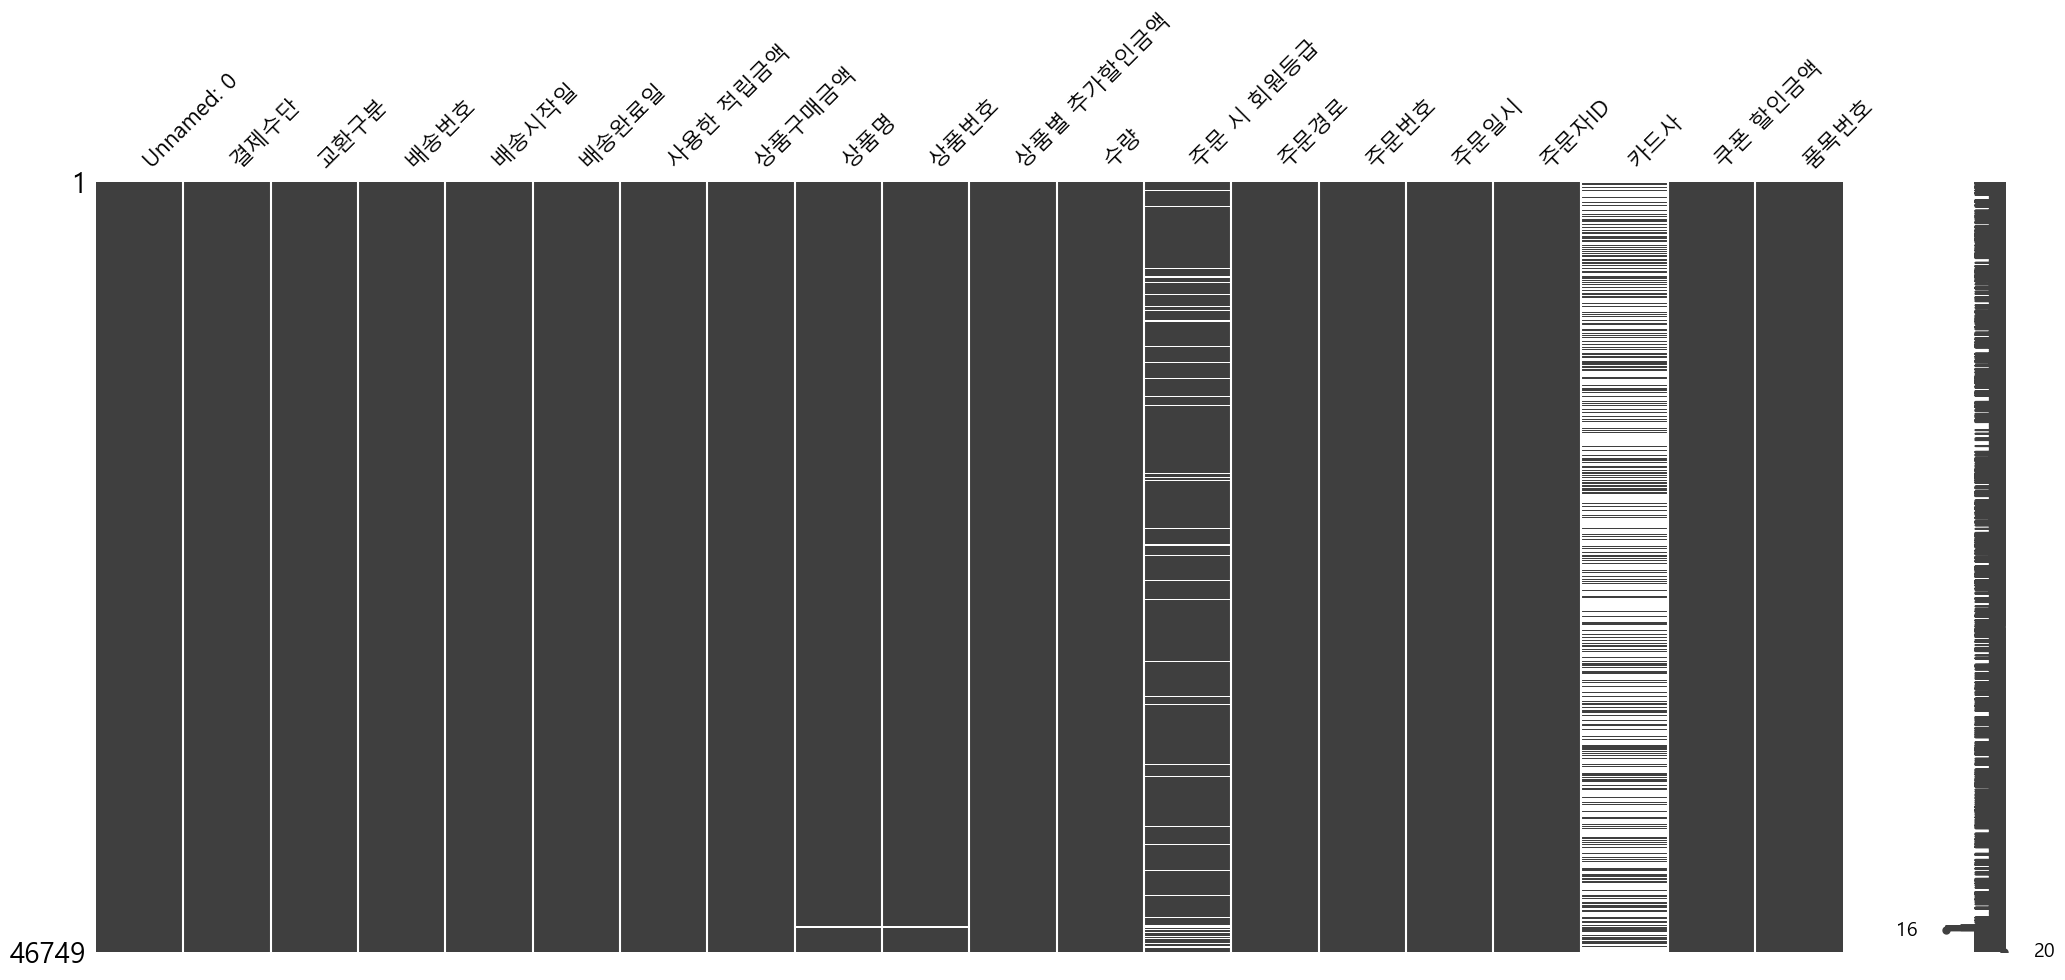

In [ ]:
msno.matrix(df1)
# 하얀부분 = 결측값

c:\Users\김영현\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



<Axes: >

C:\Users\김영현\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.

C:\Users\김영현\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.



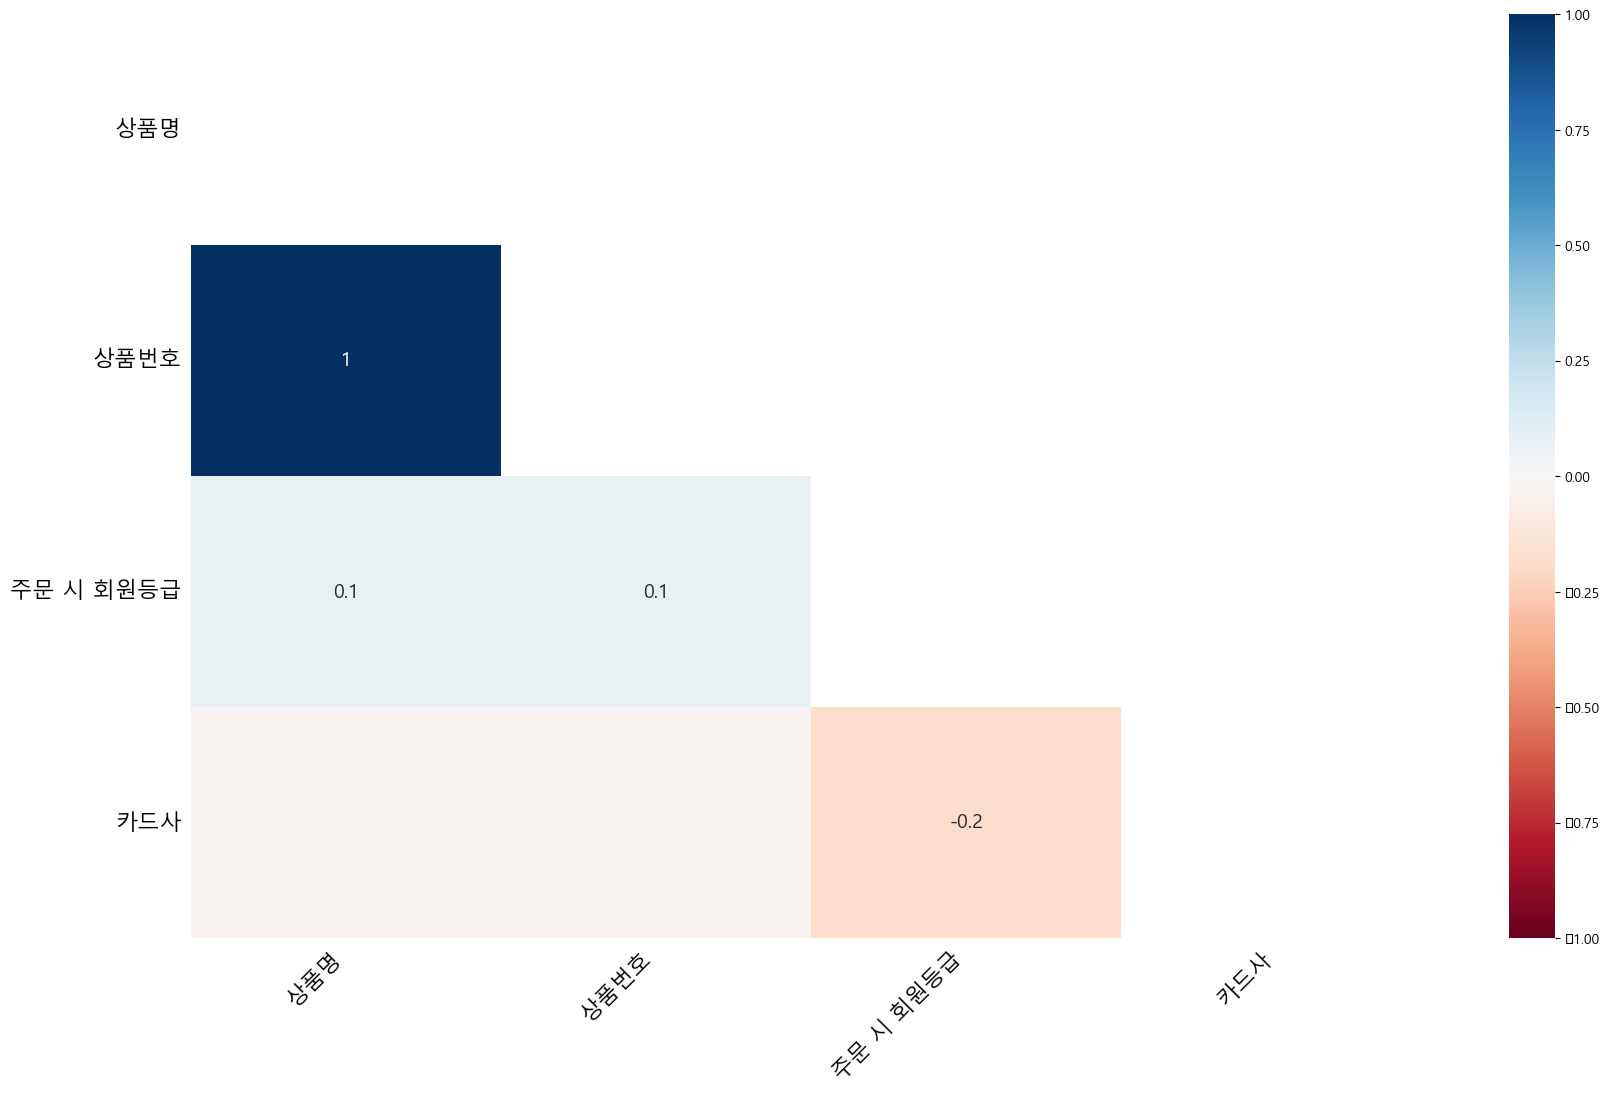

In [119]:
msno.heatmap(df1)

In [120]:
# 1 : A 컬럼에 결측값이 있다면, B 컬럼에도 반드시 결측값이 있다
# -1 : A 컬럼에 결측값이 있다면, B컬럼은 항상 값이 있다
# 0 : 상관없음